# Algorithm 0 Data Combiner / Dimension Reducer

In [1]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #Can also try MinMaxScaler or MaxAbsScaler

SETUP

591 patches created with algorithm 0 loaded.
[3.15737716e+04 2.57647900e+04 2.11864568e+04 1.87365554e+04
 1.60402408e+04 1.09183447e+04 8.57186258e+03 6.41487820e+03
 5.57646211e+03 4.21781929e+03 3.97993210e+03 3.54048599e+03
 3.27387487e+03 2.47849160e+03 2.23334822e+03 2.20443007e+03
 1.99205012e+03 1.92898542e+03 1.79559392e+03 1.76728749e+03
 1.59186439e+03 1.55411511e+03 1.47218017e+03 1.37625452e+03
 1.34274485e+03 1.28000026e+03 1.25352125e+03 1.24173783e+03
 1.21558313e+03 1.16764506e+03 1.13169740e+03 1.09668995e+03
 1.06100199e+03 1.00153791e+03 9.37771321e+02 8.56147036e+02
 7.83688282e+02 7.60316445e+02 6.87901299e+02 6.46088729e+02
 6.30904429e+02 5.94094917e+02 5.70320532e+02 5.42060234e+02
 5.34720293e+02 5.27711935e+02 5.15354661e+02 4.99155666e+02
 4.82900404e+02 4.65215827e+02 4.60359569e+02 4.48935584e+02
 4.41765402e+02 4.25020527e+02 4.19829468e+02 4.08877783e+02
 4.00596135e+02 3.91550523e+02 3.79421622e+02 3.71775139e+02
 3.68124766e+02 3.59884199e+02 3.5254928

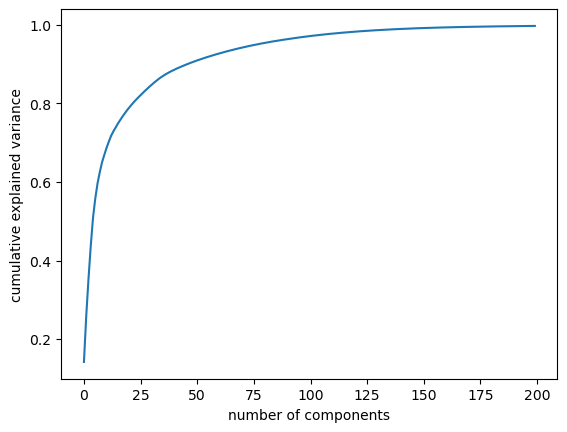

In [2]:
#open directory with the spectrograms and audio data.
used_raw_data = True

os.chdir('..')
os.chdir('./data/')

SampleFeatures = pd.read_csv('SampleSpectra0.csv', index_col = 0)

if used_raw_data:
    SampleWav = pd.read_csv('SampleWav0.csv', index_col = 0)
    SampleFeatures = pd.concat([SampleFeatures, SampleWav], axis = 1, join = 'inner')
    del SampleWav

print(len(SampleFeatures),'patches created with algorithm 0 loaded.')

# Have to rescale before using PCA
scaler = StandardScaler()
SampleFeatures = scaler.fit_transform(SampleFeatures)

# To do: extract vectors of means and stdevs to transform input for prediction later.
# Recall Z-score formula: (x-m)/s. That's exactly what this has done.
os.chdir('..')
os.chdir('./models/')
np.savetxt('mean0.csv',scaler.mean_, delimiter = ',')
np.savetxt('scale0.csv',scaler.scale_, delimiter = ',') #stdev

pca = PCA(n_components = 200) # Has to be <= min(# samples, # features)
pca.fit(SampleFeatures)
ReducedFeatures = pca.transform(SampleFeatures)
print(pca.explained_variance_)
print('reduced shape ', ReducedFeatures.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

SAVING THIS PCA TO DISK

In [3]:
with open('pca0.pkl','wb') as export_file:
    pk.dump(pca, export_file)

# In training script and predictor program, use the following
# pca_reload = pk.load(open("pca.pkl",'rb'))
# result_new = pca_reload.transform(X)